In [ ]:
# Install missing dependencies
!pip install -q kmodes

# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kmodes.kmodes import KModes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.spatial.distance import cdist
from sklearn.preprocessing import RobustScaler

**Read data**

In [ ]:
file_path_train = "train_v1.csv"
file_path_test = "test_v1.csv"

# Load datasets
train_df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)

# Extract patient IDs
train_ids = train_df['patient_id']
test_ids = test_df['patient_id']

# Drop patient_id before clustering
train_df.drop(columns=['patient_id'], inplace=True)
test_df.drop(columns=['patient_id'], inplace=True)

**Exploitary Data Analysis**

In [ ]:
print(train_df.isnull().sum())

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64


In [ ]:
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = train_df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['residence_type', 'smoking_status']
Numerical Columns: ['age', 'gender', 'chest_pain_type', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'exercise_angina', 'plasma_glucose', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease']


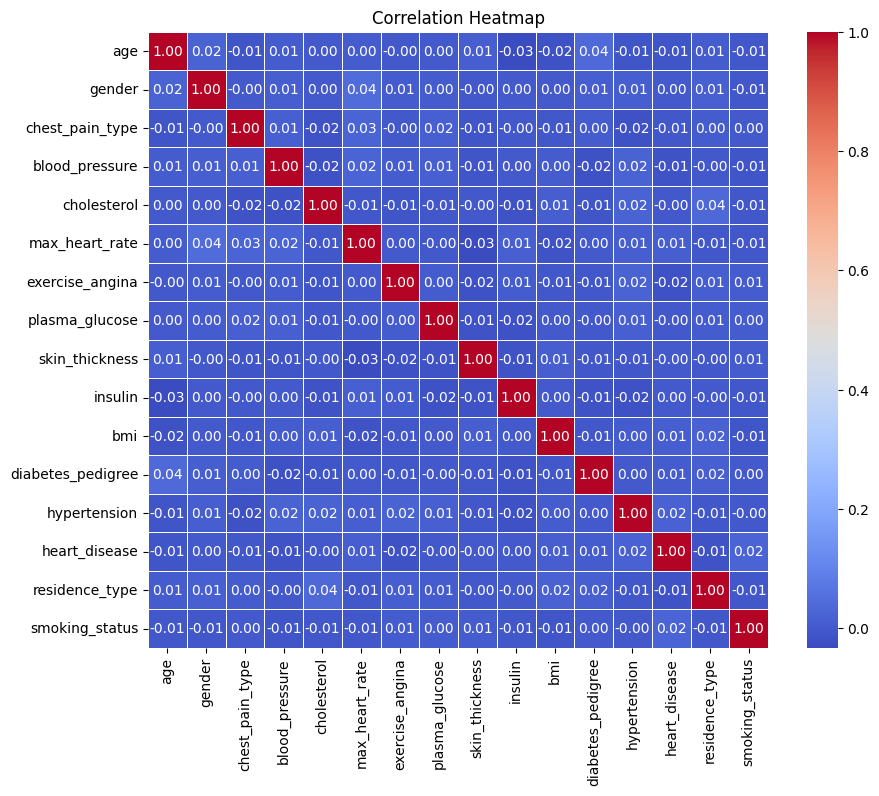

In [ ]:
categorical_cols = train_df.select_dtypes(include=['object']).columns

 # Encode categorical features
for col in categorical_cols:
        train_df[col] = LabelEncoder().fit_transform(train_df[col])

corr_matrix = train_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

**Data preprocessing**

In [ ]:
def preprocess_data(df, method=1, isTest=False):
    """
    Preprocess data based on the selected method:
    1:  StandardScaler, Polynomial Features(degree=2)
    2:  StandardScaler, PCA(n_components=0.95)
    3:  StandardScaler, KBest(k=8)
    4:  MinMaxScaler, Polynomial Features(degree=2)
    5:  MinMaxScaler, PCA(n_components=0.95)
    6:  MinMaxScaler, KBest(k=8)
    7:  RobustScaler, Polynomial Features(degree=3)
    8:  RobustScaler, Polynomial Features(degree=4)
    9:  RobustScaler, PCA(n_components=0.95)
    10: RobustScaler, KBest(k=8)

    """
    df = df.copy()

    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    numerical_cols = df.select_dtypes(exclude=['object']).columns

    # Encode categorical features
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])

    if method == 1:
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df)
        poly = PolynomialFeatures(degree=2, include_bias=False)
        df = poly.fit_transform(df_scaled)

    if method == 2:
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df)
        pca = PCA(n_components=0.95)
        df = pca.fit_transform(df_scaled)

    if method == 3:
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df)
        kbest = SelectKBest(score_func=f_classif, k=8)
        df = kbest.fit_transform(df_scaled, np.zeros(df.shape[0]))

    if method == 4:
        scaler = MinMaxScaler()
        df_scaled = scaler.fit_transform(df)
        poly = PolynomialFeatures(degree=2, include_bias=False)
        df = poly.fit_transform(df_scaled)

    if method == 5:
        scaler = MinMaxScaler()
        df_scaled = scaler.fit_transform(df)
        pca = PCA(n_components=0.95)
        df = pca.fit_transform(df_scaled)

    if method == 6:
        scaler = MinMaxScaler()
        df_scaled = scaler.fit_transform(df)
        kbest = SelectKBest(score_func=f_classif, k=8)
        df = kbest.fit_transform(df_scaled, np.zeros(df.shape[0]))

    if method == 7:
        scaler = RobustScaler()
        df_scaled = scaler.fit_transform(df)
        poly = PolynomialFeatures(degree=3, include_bias=False)
        df = poly.fit_transform(df_scaled)

    if method == 8:
        scaler = RobustScaler()
        df_scaled = scaler.fit_transform(df)
        poly = PolynomialFeatures(degree=4, include_bias=False)
        df = poly.fit_transform(df_scaled)

    if method == 9:
        scaler = RobustScaler()
        df_scaled = scaler.fit_transform(df)
        pca = PCA(n_components=0.95)
        df = pca.fit_transform(df_scaled)

    if method == 10:
        scaler = RobustScaler()
        df_scaled = scaler.fit_transform(df)
        kbest = SelectKBest(score_func=f_classif, k=8)
        df = kbest.fit_transform(df_scaled, np.zeros(df.shape[0]))

    return df


In [ ]:
# Preprocess data using all methods
train_preprocessed_1 = preprocess_data(train_df.copy(), method=1)
test_preprocessed_1 = preprocess_data(test_df.copy(), method=1, isTest=True)

train_preprocessed_2 = preprocess_data(train_df.copy(), method=2)
test_preprocessed_2 = preprocess_data(test_df.copy(), method=2, isTest=True)

train_preprocessed_3 = preprocess_data(train_df.copy(), method=3)
test_preprocessed_3 = preprocess_data(test_df.copy(), method=3, isTest=True)

train_preprocessed_4 = preprocess_data(train_df.copy(), method=4)
test_preprocessed_4 = preprocess_data(test_df.copy(), method=4, isTest=True)

train_preprocessed_5 = preprocess_data(train_df.copy(), method=5)
test_preprocessed_5 = preprocess_data(test_df.copy(), method=5, isTest=True)

train_preprocessed_6 = preprocess_data(train_df.copy(), method=6)
test_preprocessed_6 = preprocess_data(test_df.copy(), method=6, isTest=True)

train_preprocessed_7 = preprocess_data(train_df.copy(), method=7)
test_preprocessed_7 = preprocess_data(test_df.copy(), method=7,isTest=True)

train_preprocessed_8 = preprocess_data(train_df.copy(), method=8)
test_preprocessed_8 = preprocess_data(test_df.copy(), method=8, isTest=True)

train_preprocessed_9 = preprocess_data(train_df.copy(), method=9)
test_preprocessed_9 = preprocess_data(test_df.copy(), method=9, isTest=True)

train_preprocessed_10 = preprocess_data(train_df.copy(), method=10)
test_preprocessed_10 = preprocess_data(test_df.copy(), method=10)


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value

**Hyper Parameter Tuning**

In [ ]:
def tune_hyperparameters(model_name, data):
    """
    Tune hyperparameters for the given model.
    Args:
    - model_name: Name of the clustering model ("dbscan", "kmeans", "gmm", "agglom")
    - data: Preprocessed training data

    Returns:
    - Best hyperparameters as a dictionary
    - Best silhouette score
    - Best Davies-Bouldin score
    """
    best_silhouette_score = -1
    best_davies_bouldin_score = -1
    best_params = None

    if model_name == "dbscan":
        eps_values = np.arange(2.0, 3.0, 0.1)
        min_samples_values = range(3, 20)
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(data)
                if len(set(labels)) > 1:  # Avoid single-cluster cases
                    sil_score = silhouette_score(data, labels)
                    db_score = davies_bouldin_score(data, labels)

                    print(f"DBSCAN: eps={eps}, min_samples={min_samples}, Silhouette Score={sil_score:.4f}, Davies-Bouldin Score={db_score:.4f}")
                    if sil_score > best_silhouette_score:
                        best_silhouette_score = sil_score
                        best_davies_bouldin_score = db_score
                        best_params = {"eps": eps, "min_samples": min_samples}
        if not best_params:
          print("No valid DBSCAN clustering found. Using default parameters.")
          best_params = {"eps": 0.5, "min_samples": 5}  # Default DBSCAN parameters

    elif model_name == "kmeans":
        for k in range(2, 15):
            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(data)
            sil_score = silhouette_score(data, labels)
            db_score = davies_bouldin_score(data, labels)

            print(f"KMeans: k={k}, Silhouette Score={sil_score:.4f}, Davies-Bouldin Score={db_score:.4f}")
            if sil_score > best_silhouette_score:
                best_silhouette_score = sil_score
                best_davies_bouldin_score = db_score
                best_params = {"n_clusters": k}

    elif model_name == "gmm":
        for k in range(2, 15):
            gmm = GaussianMixture(n_components=k, random_state=42)
            labels = gmm.fit_predict(data)
            sil_score = silhouette_score(data, labels)
            db_score = davies_bouldin_score(data, labels)

            print(f"GMM: n_components={k}, Silhouette Score={sil_score:.4f}, Davies-Bouldin Score={db_score:.4f}")
            if sil_score > best_silhouette_score:
                best_silhouette_score = sil_score
                best_davies_bouldin_score = db_score
                best_params = {"n_components": k}

    elif model_name == "agglom":
        for k in range(2, 15):
            agglom = AgglomerativeClustering(n_clusters=k)
            labels = agglom.fit_predict(data)
            sil_score = silhouette_score(data, labels)
            db_score = davies_bouldin_score(data, labels)

            print(f"Agglomerative: n_clusters={k}, Silhouette Score={sil_score:.4f}, Davies-Bouldin Score={db_score:.4f}")
            if sil_score > best_silhouette_score:
                best_silhouette_score = sil_score
                best_davies_bouldin_score = db_score
                best_params = {"n_clusters": k}

    print(f"Best {model_name} Parameters: {best_params}, Best Silhouette Score: {best_silhouette_score:.4f}, Best Davies-Bouldin Score: {best_davies_bouldin_score:.4f}")
    return best_params, best_silhouette_score, best_davies_bouldin_score


In [ ]:
def save_submission(model_name, labels):
    submission_df = pd.DataFrame({"patient_id": test_ids, "cluster_label": labels})
    submission_df.to_csv(model_name, index=False)

**K-Means**

In [ ]:
def train_kmeans_on_all_methods():
    results = {}

    for method in range(1, 11):
        train_data = globals()[f"train_preprocessed_{method}"]
        test_data = globals()[f"test_preprocessed_{method}"]

        # Tune hyperparameters
        kmeans_params, sil_score, db_score = tune_hyperparameters("kmeans", train_data)

        # Train KMeans model
        kmeans_model = KMeans(**kmeans_params, random_state=42)
        kmeans_model.fit(train_data)

        # Predict on test data
        kmeans_predictions = kmeans_model.predict(test_data)

        # Save results
        save_submission(f"kmeans_method_{method}", kmeans_predictions)

        # Store model and scores
        results[method] = {
            "model": kmeans_model,
            "silhouette_score": sil_score,
            "davies_bouldin_score": db_score,
            "predictions": kmeans_predictions
        }

    return results


In [ ]:
# Run the function
kmeans_results = train_kmeans_on_all_methods()

KMeans: k=2, Silhouette Score=0.1430, Davies-Bouldin Score=4.6631
KMeans: k=3, Silhouette Score=0.1009, Davies-Bouldin Score=4.9666
KMeans: k=4, Silhouette Score=0.0172, Davies-Bouldin Score=6.6642
KMeans: k=5, Silhouette Score=0.0115, Davies-Bouldin Score=6.6880
KMeans: k=6, Silhouette Score=0.0015, Davies-Bouldin Score=6.8780
KMeans: k=7, Silhouette Score=-0.0089, Davies-Bouldin Score=6.8788
KMeans: k=8, Silhouette Score=-0.0014, Davies-Bouldin Score=6.9856
KMeans: k=9, Silhouette Score=-0.0048, Davies-Bouldin Score=6.8648
KMeans: k=10, Silhouette Score=-0.0072, Davies-Bouldin Score=6.7337
KMeans: k=11, Silhouette Score=-0.0047, Davies-Bouldin Score=6.6126
KMeans: k=12, Silhouette Score=-0.0092, Davies-Bouldin Score=6.4426
KMeans: k=13, Silhouette Score=-0.0084, Davies-Bouldin Score=6.3053
KMeans: k=14, Silhouette Score=-0.0081, Davies-Bouldin Score=5.9970
Best kmeans Parameters: {'n_clusters': 2}, Best Silhouette Score: 0.1430, Best Davies-Bouldin Score: 4.6631
KMeans: k=2, Silhouet

**Agglomerative Clustering**

In [ ]:
def train_agglom_on_all_methods():
    results = {}

    for method in range(1, 11):
        train_data = globals()[f"train_preprocessed_{method}"]
        test_data = globals()[f"test_preprocessed_{method}"]

        # Tune hyperparameters
        agglom_params, sil_score, db_score = tune_hyperparameters("agglom", train_data)

        # Train and predict Agglomerative clustering model
        agglom_model = AgglomerativeClustering(**agglom_params)
        agglom_predictions = agglom_model.fit_predict(test_data)

        # Save results
        save_submission(f"agglom_method_{method}", agglom_predictions)

        # Store model and scores
        results[method] = {
            "model":agglom_model,
            "silhouette_score": sil_score,
            "davies_bouldin_score": db_score,
            "predictions": agglom_predictions
        }

    return results

In [ ]:
# Run the function
agglom_results = train_agglom_on_all_methods()

Agglomerative: n_clusters=2, Silhouette Score=0.1476, Davies-Bouldin Score=4.8186
Agglomerative: n_clusters=3, Silhouette Score=0.0693, Davies-Bouldin Score=6.0885
Agglomerative: n_clusters=4, Silhouette Score=-0.0046, Davies-Bouldin Score=9.7781
Agglomerative: n_clusters=5, Silhouette Score=-0.0054, Davies-Bouldin Score=9.8789
Agglomerative: n_clusters=6, Silhouette Score=-0.0071, Davies-Bouldin Score=9.6574
Agglomerative: n_clusters=7, Silhouette Score=-0.0074, Davies-Bouldin Score=9.0866
Agglomerative: n_clusters=8, Silhouette Score=-0.0064, Davies-Bouldin Score=8.7428
Agglomerative: n_clusters=9, Silhouette Score=-0.0057, Davies-Bouldin Score=8.4171
Agglomerative: n_clusters=10, Silhouette Score=-0.0051, Davies-Bouldin Score=8.1970
Agglomerative: n_clusters=11, Silhouette Score=-0.0061, Davies-Bouldin Score=7.8513
Agglomerative: n_clusters=12, Silhouette Score=-0.0053, Davies-Bouldin Score=7.7365
Agglomerative: n_clusters=13, Silhouette Score=-0.0106, Davies-Bouldin Score=7.5736
Ag

**Gaussian Mixture Model**

In [ ]:
def train_gmm_on_all_methods():
    results = {}

    for method in range(1, 11):
        train_data = globals()[f"train_preprocessed_{method}"]
        test_data = globals()[f"test_preprocessed_{method}"]

        # Tune hyperparameters
        gmm_params, sil_score, db_score = tune_hyperparameters("gmm", train_data)

        # Train GMM
        gmm_model = GaussianMixture(**gmm_params, random_state=42)
        gmm_model.fit(train_data)

        # Predict on test data
        gmm_predictions = gmm_model.predict(test_data)

        # Save results
        save_submission(f"gmm_method_{method}", gmm_predictions)

        # Store model and scores
        results[method] = {
            "model":gmm_model,
            "silhouette_score": sil_score,
            "davies_bouldin_score": db_score,
            "predictions": gmm_predictions
        }

    return results

In [ ]:
# Run the function
gmm_results = train_gmm_on_all_methods()

GMM: n_components=2, Silhouette Score=0.0309, Davies-Bouldin Score=9.9220
GMM: n_components=3, Silhouette Score=0.0300, Davies-Bouldin Score=7.9341
GMM: n_components=4, Silhouette Score=0.0025, Davies-Bouldin Score=7.7239
GMM: n_components=5, Silhouette Score=0.0050, Davies-Bouldin Score=7.2665
GMM: n_components=6, Silhouette Score=-0.0030, Davies-Bouldin Score=6.9196
GMM: n_components=7, Silhouette Score=-0.0091, Davies-Bouldin Score=7.4964
GMM: n_components=8, Silhouette Score=-0.0003, Davies-Bouldin Score=6.9664
GMM: n_components=9, Silhouette Score=-0.0062, Davies-Bouldin Score=6.8210
GMM: n_components=10, Silhouette Score=-0.0003, Davies-Bouldin Score=6.4598
GMM: n_components=11, Silhouette Score=-0.0043, Davies-Bouldin Score=6.2213
GMM: n_components=12, Silhouette Score=-0.0143, Davies-Bouldin Score=6.3960
GMM: n_components=13, Silhouette Score=-0.0069, Davies-Bouldin Score=5.9698
GMM: n_components=14, Silhouette Score=-0.0172, Davies-Bouldin Score=5.5585
Best gmm Parameters: {'n

KeyboardInterrupt: 

**DBSCAN**

In [ ]:
def train_dbscan_on_all_methods():
    results = {}

    for method in range(1, 11):
        train_data = globals()[f"train_preprocessed_{method}"]
        test_data = globals()[f"test_preprocessed_{method}"]

        # Tune hyperparameters
        dbscan_params, sil_score, db_score = tune_hyperparameters("dbscan", train_data)

        # Train DBSCN model
        dbscan_model = DBSCAN(**dbscan_params)
        dbscan_model.fit(train_data)

        # Predict on test data
        dbscan_predictions = dbscan_model.fit_predict(test_data)

        # Save results
        save_submission(f"dbscan_method_{method}", dbscan_predictions)

        # Store model and scores
        results[method] = {
            "model":dbscan_model,
            "silhouette_score": sil_score,
            "davies_bouldin_score": db_score,
            "predictions": dbscan_predictions
        }

    return results

In [ ]:
# Run the function
dbscan_results = train_dbscan_on_all_methods()

No valid DBSCAN clustering found. Using default parameters.
Best dbscan Parameters: {'eps': 0.5, 'min_samples': 5}, Best Silhouette Score: -1.0000, Best Davies-Bouldin Score: -1.0000
DBSCAN: eps=2.0, min_samples=3, Silhouette Score=-0.2410, Davies-Bouldin Score=1.4719
DBSCAN: eps=2.0, min_samples=4, Silhouette Score=-0.2960, Davies-Bouldin Score=1.5096
DBSCAN: eps=2.0, min_samples=5, Silhouette Score=-0.3132, Davies-Bouldin Score=1.6040
DBSCAN: eps=2.0, min_samples=6, Silhouette Score=-0.3003, Davies-Bouldin Score=1.6405
DBSCAN: eps=2.0, min_samples=7, Silhouette Score=-0.2645, Davies-Bouldin Score=1.7463
DBSCAN: eps=2.0, min_samples=8, Silhouette Score=-0.2326, Davies-Bouldin Score=1.7630
DBSCAN: eps=2.0, min_samples=9, Silhouette Score=-0.2014, Davies-Bouldin Score=1.7869
DBSCAN: eps=2.0, min_samples=10, Silhouette Score=-0.1370, Davies-Bouldin Score=1.9082
DBSCAN: eps=2.1, min_samples=3, Silhouette Score=-0.1934, Davies-Bouldin Score=1.5173
DBSCAN: eps=2.1, min_samples=4, Silhouette